In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [83]:
telecom_data = pd.read_csv("telecom_churn_data.csv")
telecom_data.shape

(99999, 226)

In [84]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Basic Data Checks 

In [85]:
##checking null values in dataset
round(((telecom_data.isnull().sum()/len(telecom_data)) * 100),2).sort_values(ascending = False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
                            ...  
last_day_rch_amt_6           0.00
last_day_rch_amt_7           0.00
last_day_rch_amt_8           0.00
last_day_rch_amt_9           0.00
mobile_number                0.00
Length: 226, dtype: float64

In [86]:
##checking data distribution
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Data Preparation

In [87]:
##Filtering high-value customers

In [88]:
#fetching columns that contains 'RECH' values
rech_columns = telecom_data.columns[telecom_data.columns.str.contains('rech')]
rech_columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [89]:
#'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9' will give us idea about user's total recharge
# We need to find high value customers based on first two month's total recharge i.e  'total_rech_amt_6' and 'total_rech_amt_7'

telecom_data['avg_rech_amt_gp'] = (telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7'])/2
telecom_hv_cust_data = telecom_data[telecom_data['avg_rech_amt_gp'] > telecom_data['avg_rech_amt_gp'].quantile(0.70)]
telecom_hv_cust_data.shape

(29979, 227)

In [90]:
##Next step is to tag churners based on churn phase i.e 4th month usage
telecom_hv_cust_data['total_usage'] = telecom_hv_cust_data['total_og_mou_9'] + telecom_hv_cust_data['total_ic_mou_9'] + telecom_hv_cust_data['vol_2g_mb_9'] + telecom_hv_cust_data['vol_3g_mb_9']
telecom_hv_cust_data['churn'] = telecom_hv_cust_data['total_usage'].apply(lambda x: 1 if x == 0 else 0)
telecom_hv_cust_data['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

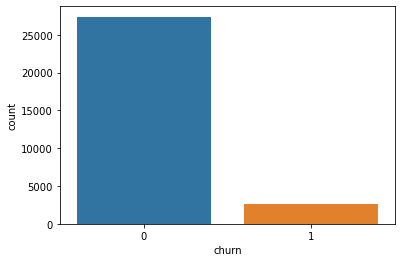

In [91]:
#plotting the distribution of churn using countplot
sns.countplot(telecom_hv_cust_data['churn']) #shows class imbalance clearly

In [92]:
##next step is to remove all the attributes corresponding to the churn phase i.e containing _9 in column names
import re
for column in telecom_hv_cust_data.columns:
    if re.search("._9", column):
        telecom_hv_cust_data.drop(columns=[column], inplace=True)

In [93]:
telecom_hv_cust_data.shape

(29979, 175)

In [94]:
telecom_hv_cust_data.drop(columns='sep_vbc_3g',inplace=True)

In [95]:
telecom_hv_cust_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_gp,total_usage,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,NaN,NaN,NaN,802,57.74,19.38,18.74,1185.0,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,NaN,1.0,1.0,315,21.03,910.65,122.16,519.0,177.09,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,...,NaN,NaN,1.0,2607,0.00,0.00,0.00,380.0,1077.95,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,NaN,NaN,NaN,511,0.00,2.45,21.89,459.0,590.30,0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,...,NaN,NaN,NaN,667,0.00,0.00,0.00,408.0,718.21,0


### Feature Engineering

In [96]:
telecom_final_data = telecom_hv_cust_data.copy();

In [97]:
#checking columns having null values greater than 50%
cols = telecom_final_data.columns[telecom_final_data.isnull().mean() > 0.05]
cols

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [98]:
telecom_final_data[cols].isnull().sum()

date_of_last_rech_data_6    18592
date_of_last_rech_data_7    18327
date_of_last_rech_data_8    18238
total_rech_data_6           18592
total_rech_data_7           18327
total_rech_data_8           18238
max_rech_data_6             18592
max_rech_data_7             18327
max_rech_data_8             18238
count_rech_2g_6             18592
count_rech_2g_7             18327
count_rech_2g_8             18238
count_rech_3g_6             18592
count_rech_3g_7             18327
count_rech_3g_8             18238
av_rech_amt_data_6          18592
av_rech_amt_data_7          18327
av_rech_amt_data_8          18238
arpu_3g_6                   18592
arpu_3g_7                   18327
arpu_3g_8                   18238
arpu_2g_6                   18592
arpu_2g_7                   18327
arpu_2g_8                   18238
night_pck_user_6            18592
night_pck_user_7            18327
night_pck_user_8            18238
fb_user_6                   18592
fb_user_7                   18327
fb_user_8     

total_rech_data, date_of_last_rech_data, max_rech_data, count_rech_2g, count_rech_3g, av_rech_amt_data, arpu_3g, night_pck_user, fb_user all these variables have same number of missing rows in June , July and August

In [99]:
#deriving new features from these columns
#isInternet user or not based on max reacharge of data
telecom_final_data['IsInternetUser_6']= telecom_final_data.max_rech_data_6.apply(lambda x : 0 if pd.isna(x) else 1)
telecom_final_data['IsInternetUser_7']= telecom_final_data.max_rech_data_7.apply(lambda x : 0 if pd.isna(x) else 1)
telecom_final_data['IsInternetUser_8']= telecom_final_data.max_rech_data_8.apply(lambda x : 0 if pd.isna(x) else 1)

In [100]:
#checking how many users have churned based on internet usage 
telecom_final_data[((telecom_final_data['IsInternetUser_6']==1) |
                    (telecom_final_data['IsInternetUser_7']==1)) &
                    (telecom_final_data['IsInternetUser_8']==0)].churn.value_counts()

0    3269
1     651
Name: churn, dtype: int64

In [101]:
#dropping cols as we have derived features from it
telecom_final_data.drop(columns=cols,inplace=True)
telecom_final_data.shape

(29979, 147)

In [102]:
##Checking rest of the missing values
missing_val_cols = telecom_final_data.columns[(telecom_final_data.isnull().sum()/len(telecom_final_data)) > 0]
telecom_final_data[missing_val_cols].isnull().sum().sort_values(ascending = False)

loc_og_t2f_mou_8        938
std_ic_t2f_mou_8        938
std_ic_t2m_mou_8        938
isd_og_mou_8            938
std_ic_t2t_mou_8        938
                       ... 
loc_ic_t2o_mou          114
std_og_t2o_mou          114
loc_og_t2o_mou          114
date_of_last_rech_6      62
last_date_of_month_7     31
Length: 95, dtype: int64

In [103]:
#Imputing 0 in numeric column's missing values
for column in missing_val_cols:
    if telecom_final_data[column].dtype != np.object:
        telecom_final_data[column].fillna(0, inplace=True)

In [104]:
#As observed all the date columns in dataset has dtype of Object, so converting them into date type
for column in telecom_final_data.columns:
    if re.search(".*date.*", column):
        # change data type
        telecom_final_data[column]= pd.to_datetime(telecom_final_data[column]).dt.date

In [105]:
#Only 3 categorical columns left having missing values i.e date_of_last_rech_7, date_of_last_rech_6 and date_of_last_rech_8
#calculating days since last recharge of the month
def get_days(columnVal, month_last_day):
    if pd.isna(columnVal):
        return -1
    else:
        diff=month_last_day-columnVal
        return diff.days
    
lastday=telecom_final_data[:1].last_date_of_month_6.values[0]
telecom_final_data['days_last_rech_amt_6']= telecom_final_data.date_of_last_rech_6.apply(lambda x : get_days(x,lastday))

lastday=telecom_final_data[:1].last_date_of_month_7.values[0]
telecom_final_data['days_last_rech_amt_7']=telecom_final_data.date_of_last_rech_7.apply(lambda x : get_days(x,lastday))

lastday=telecom_final_data[:1].last_date_of_month_8.values[0]
telecom_final_data['days_last_rech_amt_8']=telecom_final_data.date_of_last_rech_8.apply(lambda x : get_days(x,lastday))

#dropping these 3 date columns as we have created the derived features from them
telecom_final_data.drop(columns = ['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8'], inplace=True)

In [106]:
#dropping columns containing less than 2 unique values
no_variance_columns = telecom_final_data.columns[telecom_final_data.loc[:,:].nunique() < 2]
no_variance_columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [107]:
telecom_final_data.drop(columns=no_variance_columns, inplace=True)

In [108]:
#Also dropping the features we have created to define churn i.e avg_rech_amt_gp and total_usage
telecom_final_data.drop(columns=['avg_rech_amt_gp','total_usage'], inplace=True)

In [109]:
#check if still missing values present in dataset
telecom_final_data.isnull().sum()

mobile_number           0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
                       ..
IsInternetUser_7        0
IsInternetUser_8        0
days_last_rech_amt_6    0
days_last_rech_amt_7    0
days_last_rech_amt_8    0
Length: 132, dtype: int64

In [110]:
telecom_final_data.shape

(29979, 132)

### Merging Good Phase Variables 

Good Phase is defined as 6 and 7 months. Merging all the KPIs of good phase to represent it with single KPI

In [111]:
cols_6 = telecom_final_data.columns[telecom_final_data.columns.str.contains('_6')]
cols_6

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6',
       'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'IsInternetUser_6',
       'days_last_rech_amt_6'],
      dtype='object')

In [112]:
for column in cols_6:
        kpi_6 = column
        kpi_7 = re.sub('6$', '7', kpi_6)
        kpi = re.sub('6$', 'gp', kpi_6)
        telecom_final_data[kpi] = (telecom_final_data[kpi_6] + telecom_final_data[kpi_7])/2
        telecom_final_data.drop(columns = [kpi_6,kpi_7], inplace=True)

In [113]:
telecom_final_data.shape

(29979, 90)

### Bivariate Analysis

In [114]:
##Plotting graphs of absolute diff between KPIs of 8 month and good phase

In [115]:
cols_gp = telecom_final_data.columns[telecom_final_data.columns.str.contains('_gp')]
cols_gp

Index(['arpu_gp', 'onnet_mou_gp', 'offnet_mou_gp', 'roam_ic_mou_gp',
       'roam_og_mou_gp', 'loc_og_t2t_mou_gp', 'loc_og_t2m_mou_gp',
       'loc_og_t2f_mou_gp', 'loc_og_t2c_mou_gp', 'loc_og_mou_gp',
       'std_og_t2t_mou_gp', 'std_og_t2m_mou_gp', 'std_og_t2f_mou_gp',
       'std_og_mou_gp', 'isd_og_mou_gp', 'spl_og_mou_gp', 'og_others_gp',
       'total_og_mou_gp', 'loc_ic_t2t_mou_gp', 'loc_ic_t2m_mou_gp',
       'loc_ic_t2f_mou_gp', 'loc_ic_mou_gp', 'std_ic_t2t_mou_gp',
       'std_ic_t2m_mou_gp', 'std_ic_t2f_mou_gp', 'std_ic_mou_gp',
       'total_ic_mou_gp', 'spl_ic_mou_gp', 'isd_ic_mou_gp', 'ic_others_gp',
       'total_rech_num_gp', 'total_rech_amt_gp', 'max_rech_amt_gp',
       'last_day_rch_amt_gp', 'vol_2g_mb_gp', 'vol_3g_mb_gp', 'monthly_2g_gp',
       'sachet_2g_gp', 'monthly_3g_gp', 'sachet_3g_gp', 'IsInternetUser_gp',
       'days_last_rech_amt_gp'],
      dtype='object')

Diff between arpu_gp and arpu_8


<Figure size 2160x1440 with 0 Axes>

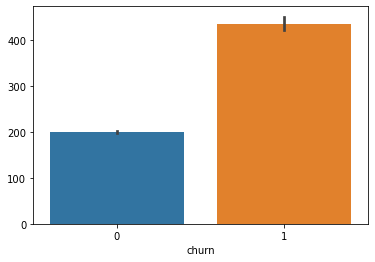

Diff between onnet_mou_gp and onnet_mou_8


<Figure size 2160x1440 with 0 Axes>

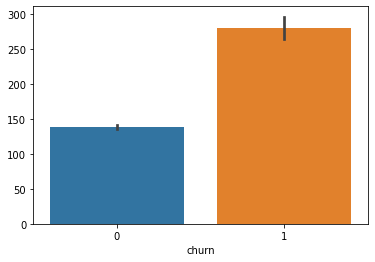

Diff between offnet_mou_gp and offnet_mou_8


<Figure size 2160x1440 with 0 Axes>

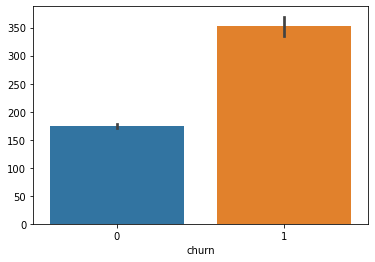

Diff between roam_ic_mou_gp and roam_ic_mou_8


<Figure size 2160x1440 with 0 Axes>

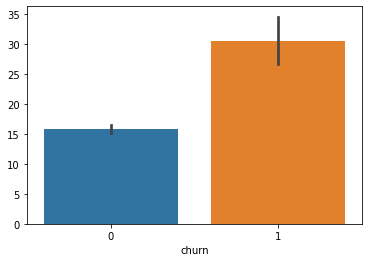

Diff between roam_og_mou_gp and roam_og_mou_8


<Figure size 2160x1440 with 0 Axes>

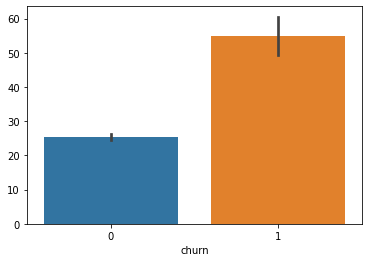

Diff between loc_og_t2t_mou_gp and loc_og_t2t_mou_8


<Figure size 2160x1440 with 0 Axes>

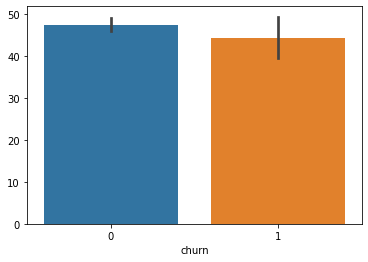

Diff between loc_og_t2m_mou_gp and loc_og_t2m_mou_8


<Figure size 2160x1440 with 0 Axes>

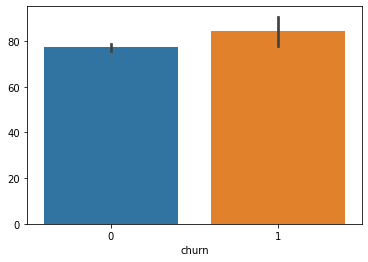

Diff between loc_og_t2f_mou_gp and loc_og_t2f_mou_8


<Figure size 2160x1440 with 0 Axes>

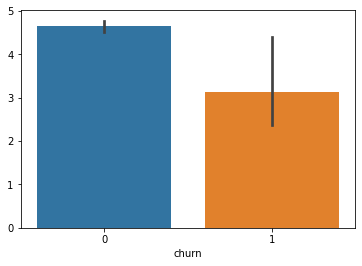

Diff between loc_og_t2c_mou_gp and loc_og_t2c_mou_8


<Figure size 2160x1440 with 0 Axes>

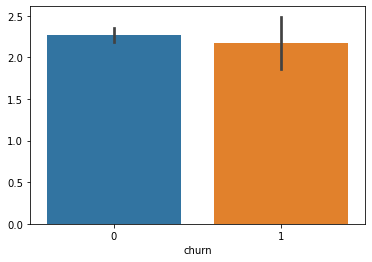

Diff between loc_og_mou_gp and loc_og_mou_8


<Figure size 2160x1440 with 0 Axes>

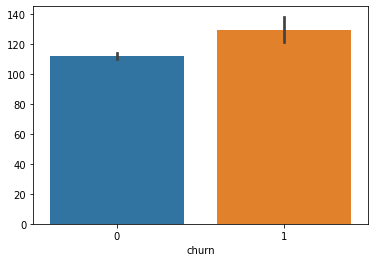

Diff between std_og_t2t_mou_gp and std_og_t2t_mou_8


<Figure size 2160x1440 with 0 Axes>

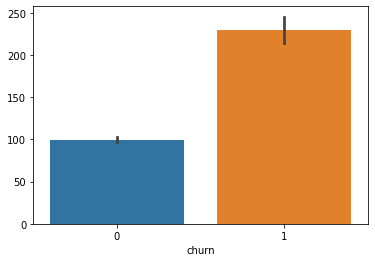

Diff between std_og_t2m_mou_gp and std_og_t2m_mou_8


<Figure size 2160x1440 with 0 Axes>

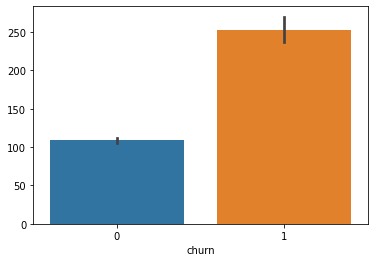

Diff between std_og_t2f_mou_gp and std_og_t2f_mou_8


<Figure size 2160x1440 with 0 Axes>

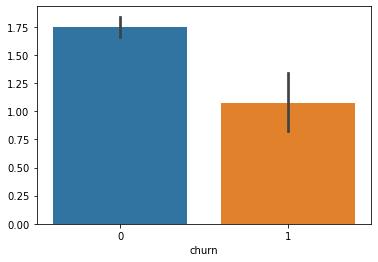

Diff between std_og_mou_gp and std_og_mou_8


<Figure size 2160x1440 with 0 Axes>

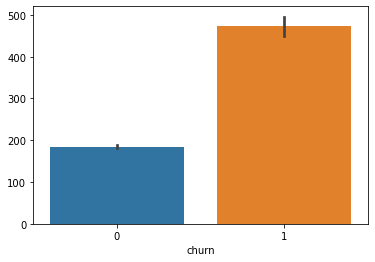

Diff between isd_og_mou_gp and isd_og_mou_8


<Figure size 2160x1440 with 0 Axes>

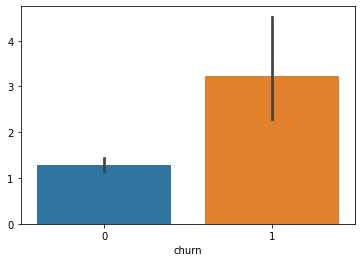

Diff between spl_og_mou_gp and spl_og_mou_8


<Figure size 2160x1440 with 0 Axes>

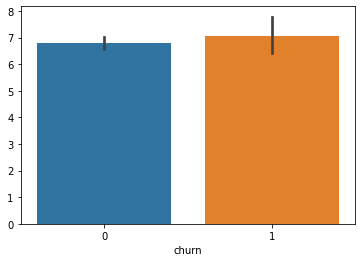

Diff between og_others_gp and og_others_8


<Figure size 2160x1440 with 0 Axes>

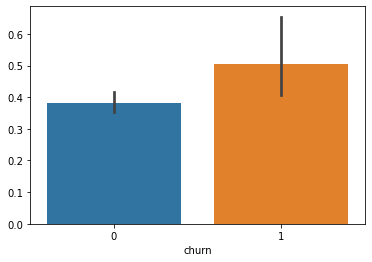

Diff between total_og_mou_gp and total_og_mou_8


<Figure size 2160x1440 with 0 Axes>

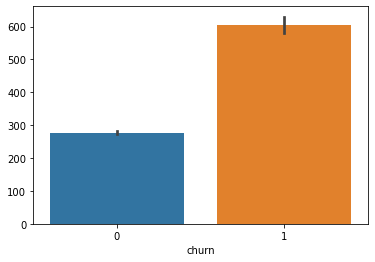

Diff between loc_ic_t2t_mou_gp and loc_ic_t2t_mou_8


<Figure size 2160x1440 with 0 Axes>

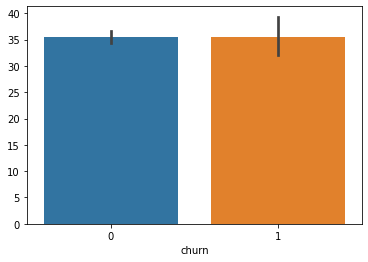

Diff between loc_ic_t2m_mou_gp and loc_ic_t2m_mou_8


<Figure size 2160x1440 with 0 Axes>

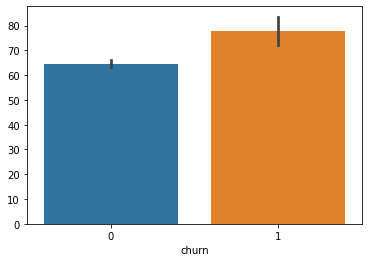

Diff between loc_ic_t2f_mou_gp and loc_ic_t2f_mou_8


<Figure size 2160x1440 with 0 Axes>

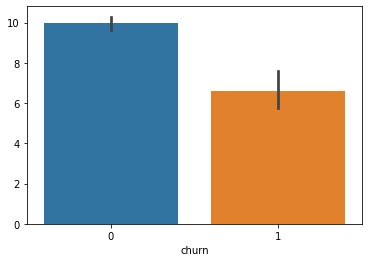

Diff between loc_ic_mou_gp and loc_ic_mou_8


<Figure size 2160x1440 with 0 Axes>

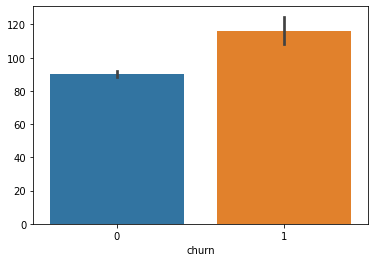

Diff between std_ic_t2t_mou_gp and std_ic_t2t_mou_8


<Figure size 2160x1440 with 0 Axes>

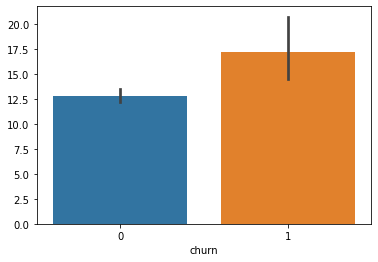

Diff between std_ic_t2m_mou_gp and std_ic_t2m_mou_8


<Figure size 2160x1440 with 0 Axes>

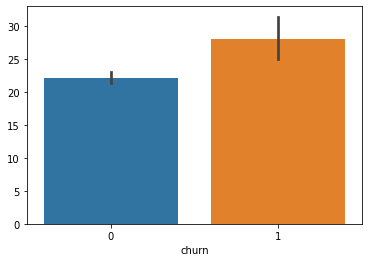

Diff between std_ic_t2f_mou_gp and std_ic_t2f_mou_8


<Figure size 2160x1440 with 0 Axes>

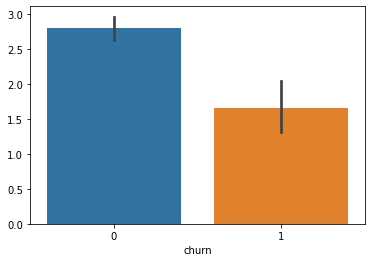

Diff between std_ic_mou_gp and std_ic_mou_8


<Figure size 2160x1440 with 0 Axes>

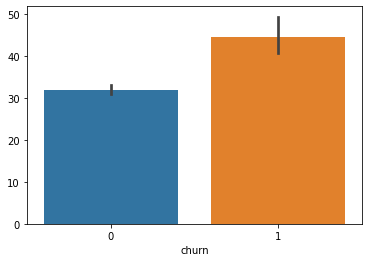

Diff between total_ic_mou_gp and total_ic_mou_8


<Figure size 2160x1440 with 0 Axes>

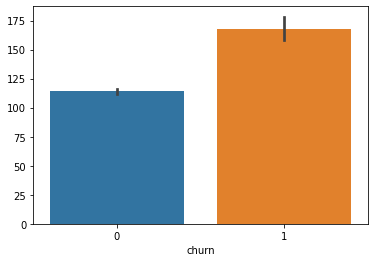

Diff between spl_ic_mou_gp and spl_ic_mou_8


<Figure size 2160x1440 with 0 Axes>

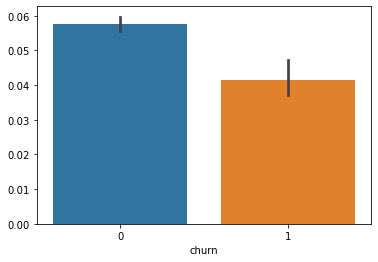

Diff between isd_ic_mou_gp and isd_ic_mou_8


<Figure size 2160x1440 with 0 Axes>

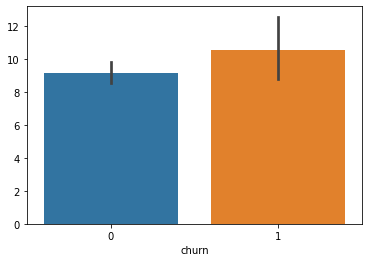

Diff between ic_others_gp and ic_others_8


<Figure size 2160x1440 with 0 Axes>

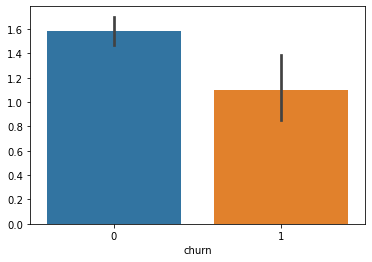

Diff between total_rech_num_gp and total_rech_num_8


<Figure size 2160x1440 with 0 Axes>

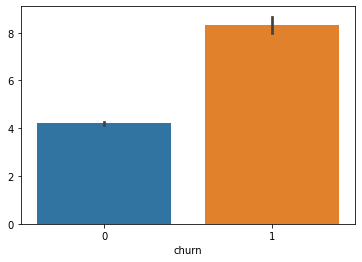

Diff between total_rech_amt_gp and total_rech_amt_8


<Figure size 2160x1440 with 0 Axes>

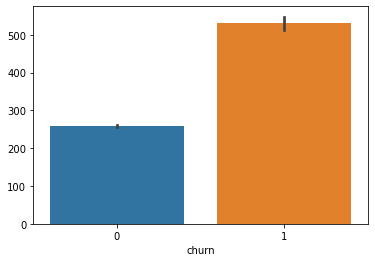

Diff between max_rech_amt_gp and max_rech_amt_8


<Figure size 2160x1440 with 0 Axes>

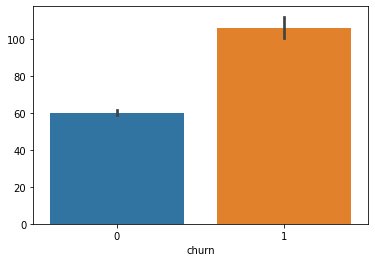

Diff between last_day_rch_amt_gp and last_day_rch_amt_8


<Figure size 2160x1440 with 0 Axes>

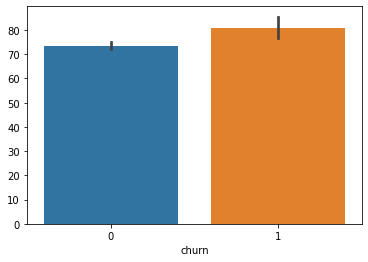

Diff between vol_2g_mb_gp and vol_2g_mb_8


<Figure size 2160x1440 with 0 Axes>

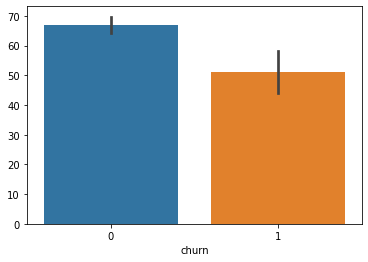

Diff between vol_3g_mb_gp and vol_3g_mb_8


<Figure size 2160x1440 with 0 Axes>

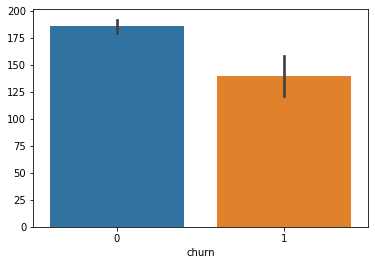

Diff between monthly_2g_gp and monthly_2g_8


<Figure size 2160x1440 with 0 Axes>

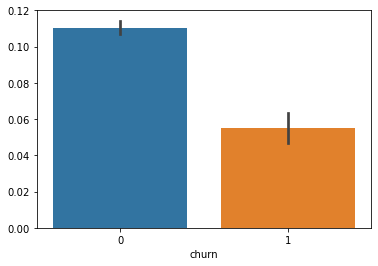

Diff between sachet_2g_gp and sachet_2g_8


<Figure size 2160x1440 with 0 Axes>

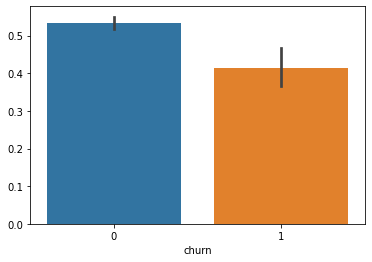

Diff between monthly_3g_gp and monthly_3g_8


<Figure size 2160x1440 with 0 Axes>

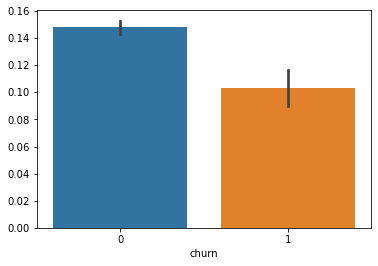

Diff between sachet_3g_gp and sachet_3g_8


<Figure size 2160x1440 with 0 Axes>

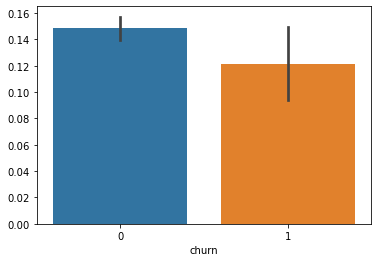

Diff between IsInternetUser_gp and IsInternetUser_8


<Figure size 2160x1440 with 0 Axes>

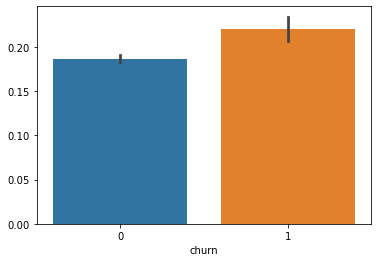

Diff between days_last_rech_amt_gp and days_last_rech_amt_8


<Figure size 2160x1440 with 0 Axes>

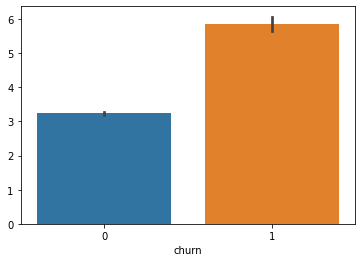

In [116]:
for column in cols_gp:
        kpi_gp = column
        kpi_8 = re.sub('gp$', '8', kpi_gp)
        plt.figure(figsize=(30,20))
        fig, axs = plt.subplots()
        print("Diff between {} and {}".format(kpi_gp,kpi_8))
        sns.barplot(y=abs(telecom_final_data[kpi_gp] - telecom_final_data[kpi_8]), x=telecom_final_data['churn'])
        plt.show()

### Outlier Treatment 

In [117]:
##Removing outliers i.e below 1 percentile and above 99 percentile values present in any column
def remove_outliers():
    for column in telecom_final_data.columns:
        LT = telecom_final_data[column].quantile(0.01)
        UT = telecom_final_data[column].quantile(0.99)

        telecom_test = telecom_final_data[(telecom_final_data[column] <= UT) & (telecom_final_data[column] >= LT)]
    return telecom_test

In [118]:
telecom_final_data = remove_outliers()

In [119]:
telecom_final_data.shape

(29659, 90)

### Train Test Split  

In [120]:
X = telecom_final_data.drop(['churn','mobile_number'], axis = 1)
y = telecom_final_data['churn']

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555, stratify=y)

In [122]:
y_train= y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [123]:
print("X train shape :", X_train.shape)
print("y train shape :", y_train.shape)
print("X test shape :", X_test.shape)
print("y test shape :", y_test.shape)

X train shape : (23727, 88)
y train shape : (23727, 1)
X test shape : (5932, 88)
y test shape : (5932, 1)


### Normalizing Continuous Features

In [124]:
from sklearn import preprocessing
X_scaler = preprocessing.StandardScaler().fit(X_train)

Xtrain=X_scaler.transform(X_train) 
Xtest=X_scaler.transform(X_test) 

### PCA for Dimensionality reduction 

In [125]:
from sklearn.decomposition import PCA

In [126]:
#Applying PCA and finding out no of variables that can explain 90% of the data
pca = PCA(random_state=500)
pca.fit(Xtrain)

PCA(random_state=500)

In [127]:
pca.components_

array([[ 2.14114232e-01,  8.33497453e-02,  1.55891311e-01, ...,
         5.06913370e-03,  5.86541789e-02, -2.34002711e-02],
       [ 1.13890270e-01,  2.04275519e-01,  1.66677714e-01, ...,
        -1.58696892e-02, -1.20129849e-01, -1.19082385e-01],
       [ 1.59901313e-01, -1.55708050e-03,  1.22380447e-02, ...,
         8.24794216e-02,  1.86626190e-01,  5.33562055e-02],
       ...,
       [ 1.23851885e-06,  4.99905153e-06,  4.54691532e-06, ...,
         1.16921803e-07, -1.16958290e-07,  2.66007708e-08],
       [ 8.31205315e-08,  2.25953380e-06,  6.99208625e-07, ...,
        -8.98149070e-08,  1.63656058e-07, -7.40301215e-08],
       [-1.57122645e-07,  3.65228774e-07, -2.19471264e-08, ...,
         3.59557219e-08,  1.40933349e-07, -2.36677455e-08]])

In [128]:
pca.explained_variance_ratio_

array([1.05754138e-01, 9.44323677e-02, 6.58187689e-02, 4.80926856e-02,
       4.64840405e-02, 3.83632234e-02, 3.04432025e-02, 2.89958863e-02,
       2.85923212e-02, 2.66423340e-02, 2.61655756e-02, 2.41375664e-02,
       2.30348297e-02, 2.20578910e-02, 2.12747518e-02, 1.97220935e-02,
       1.86124100e-02, 1.75570287e-02, 1.67371599e-02, 1.47370317e-02,
       1.38556549e-02, 1.35652890e-02, 1.27979004e-02, 1.22373418e-02,
       1.15565981e-02, 1.09621689e-02, 1.02813252e-02, 9.94148714e-03,
       9.64034181e-03, 9.25449340e-03, 9.02325315e-03, 8.98958456e-03,
       8.16649669e-03, 7.89283481e-03, 7.67934199e-03, 7.39744042e-03,
       7.26821035e-03, 7.13456067e-03, 6.51707140e-03, 6.12399842e-03,
       5.97668192e-03, 5.53364647e-03, 5.47818050e-03, 4.88448959e-03,
       4.78489687e-03, 4.54910664e-03, 3.92791394e-03, 3.73621109e-03,
       3.67250472e-03, 3.57725156e-03, 3.53374052e-03, 3.23757585e-03,
       3.06997443e-03, 3.00428999e-03, 2.89205669e-03, 2.85362151e-03,
      

In [129]:
#visualizing using scree plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)

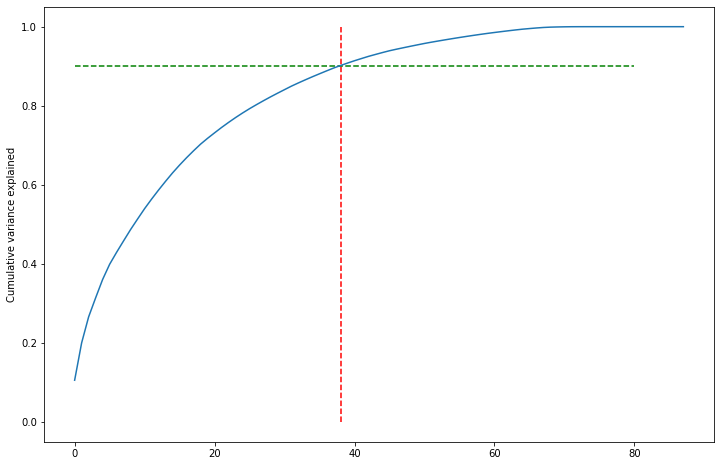

In [130]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=38, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [131]:
#38 components are able to explain 90% of the data so using n_components as 38
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=38)

In [132]:
X_train_pca = pca_final.fit_transform(Xtrain)
X_train_pca.shape

(23727, 38)

In [133]:
X_test_pca = pca_final.transform(Xtest)
X_test_pca.shape

(5932, 38)

### Model Building 

In [134]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(X_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(X_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(X_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(X_test_pca)))

In [135]:
def precision_recall_score(classifier):
    print("Train Precision Score :", precision_score(y_train, classifier.predict(X_train_pca)))
    print("Train Recall Score :", recall_score(y_train, classifier.predict(X_train_pca)))
    print("-"*50)
    print("Test Precision Score :", precision_score(y_test, classifier.predict(X_test_pca)))
    print("Test Recall Score :", recall_score(y_test, classifier.predict(X_test_pca)))

### Applying RandomForest with PCA

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [137]:
##Applying random forest model and passing class_weight as target class is imbalanced
randomForestClassifier = RandomForestClassifier(class_weight='balanced', random_state=100).fit(X_train_pca, y_train)
randomForestClassifier

RandomForestClassifier(class_weight='balanced', random_state=100)

In [138]:
evaluate_model(randomForestClassifier)

Train Accuracy : 1.0
Train Confusion Matrix:
[[21690     0]
 [    0  2037]]
--------------------------------------------------
Test Accuracy : 0.9209372892784895
Test Confusion Matrix:
[[5354   69]
 [ 400  109]]


In [139]:
precision_recall_score(randomForestClassifier)

Train Precision Score : 1.0
Train Recall Score : 1.0
--------------------------------------------------
Test Precision Score : 0.6123595505617978
Test Recall Score : 0.21414538310412573


### Applying Logistic Regression with PCA

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
##Applying Logistic Regression model and passing class_weight as target class is imbalanced
logisticRegression = LogisticRegression(class_weight='balanced', random_state=222).fit(X_train_pca, y_train)
logisticRegression

LogisticRegression(class_weight='balanced', random_state=222)

In [142]:
evaluate_model(logisticRegression)

Train Accuracy : 0.8258945505120748
Train Confusion Matrix:
[[17893  3797]
 [  334  1703]]
--------------------------------------------------
Test Accuracy : 0.8260283209710048
Test Confusion Matrix:
[[4480  943]
 [  89  420]]


In [143]:
precision_recall_score(logisticRegression)

Train Precision Score : 0.30963636363636365
Train Recall Score : 0.836033382425135
--------------------------------------------------
Test Precision Score : 0.30814380044020545
Test Recall Score : 0.825147347740668


Logistic Regression is giving better recall score.We are selecting Logistic Regression with PCA for churn prediction.

### Model Building for Important Features Selection 

In [144]:
import xgboost as xgb
from imblearn.ensemble import RUSBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_precision_recall_curve

In [145]:
def evaluate_model_without_pca(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Precision :", precision_score(y_train, dt_classifier.predict(X_train)))
    print("Train Recall :", recall_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Precision :", precision_score(y_test, dt_classifier.predict(X_test)))
    print("Test Recall :", recall_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### Applying XgBoost 

In [146]:
xgboost = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic',random_state=100).fit(X_train, y_train)

[21:39:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [147]:
#Hyperparameter tuning using gridSearchCV for finding out best estimators for XGboost
params = {
    'n_estimators': [20, 10],
    'subsample':[0.8,0.9],
    'min_samples_leaf':[1150,200,500],
    'scale_pos_weight': [10,20,30]
}

In [148]:
grid_search = GridSearchCV(estimator=xgboost, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [149]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.7min finished


[21:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 42s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=1, random_state=100,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
      

In [150]:
xg_best = grid_search.best_estimator_

In [151]:
xg_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, min_samples_leaf=1150, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=-1,
              num_parallel_tree=1, random_state=100, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=30, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [152]:
evaluate_model_without_pca(xg_best)

Train Accuracy : 0.8684620896025624
Train Precision : 0.3930966469428008
Train Recall : 0.9783996072655866
Train Confusion Matrix:
[[18613  3077]
 [   44  1993]]
--------------------------------------------------
Test Accuracy : 0.8489548213081591
Test Precision : 0.3508095605242868
Test Recall : 0.8939096267190569
Test Confusion Matrix:
[[4581  842]
 [  54  455]]


In [153]:
xg_best.feature_importances_

array([0.00603751, 0.00355455, 0.00206116, 0.02151862, 0.05130142,
       0.00867848, 0.00538768, 0.00739031, 0.00623251, 0.00838647,
       0.00634701, 0.00470324, 0.0072521 , 0.00540617, 0.00550426,
       0.0055446 , 0.        , 0.00900516, 0.00430344, 0.02338892,
       0.0048154 , 0.14008972, 0.00454684, 0.00676632, 0.0053142 ,
       0.00413917, 0.1252686 , 0.00797773, 0.01091691, 0.00793841,
       0.00738321, 0.02472175, 0.00872853, 0.02171304, 0.00929336,
       0.00642473, 0.00191888, 0.0036152 , 0.00562436, 0.        ,
       0.00733755, 0.0021811 , 0.00494363, 0.00363209, 0.02664639,
       0.02955963, 0.00543085, 0.00664038, 0.        , 0.02037527,
       0.00993211, 0.00968082, 0.00184449, 0.01292203, 0.00366435,
       0.01491118, 0.00988324, 0.01088459, 0.00408339, 0.01263561,
       0.01036507, 0.00344051, 0.00420396, 0.01722244, 0.00430711,
       0.00902489, 0.00626113, 0.00442288, 0.00979147, 0.00660783,
       0.00092525, 0.00582895, 0.00828721, 0.0028924 , 0.00495

In [154]:
xgboost_dict = {X_train.columns[i]: xg_best.feature_importances_[i] for i in range(len( X_train.columns)) if xg_best.feature_importances_[i]!=0} 

In [155]:
xgboost_dict=dict(sorted(xgboost_dict.items(), key=lambda item: item[1],reverse=True))

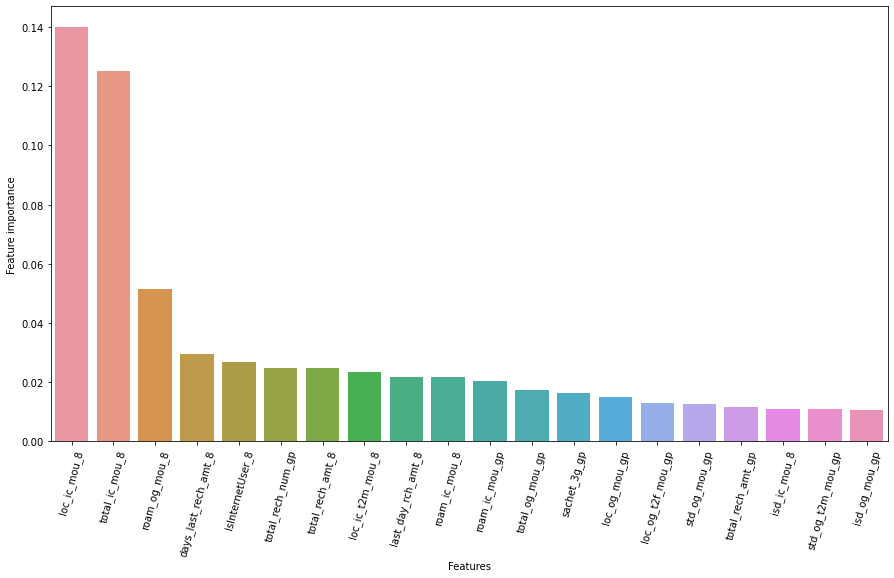

In [156]:
plt.figure(figsize=(15,8))
ax=sns.barplot(x= list(xgboost_dict.keys())[:20], y=  list(xgboost_dict.values())[:20])
ax.tick_params('x',labelrotation=75)
plt.ylabel("Feature importance")
plt.xlabel("Features")
plt.show()

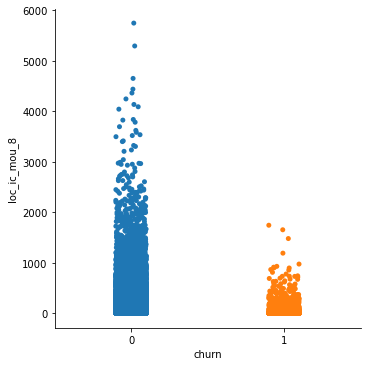

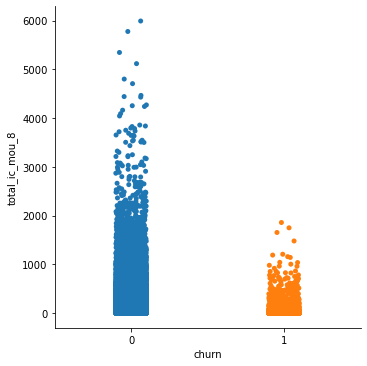

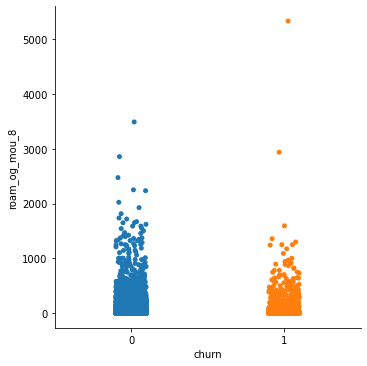

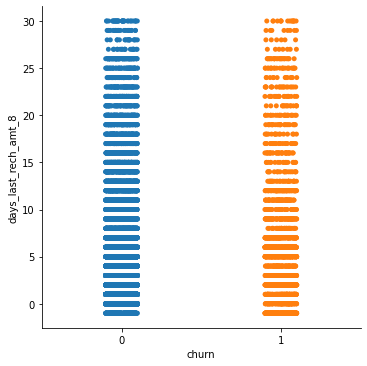

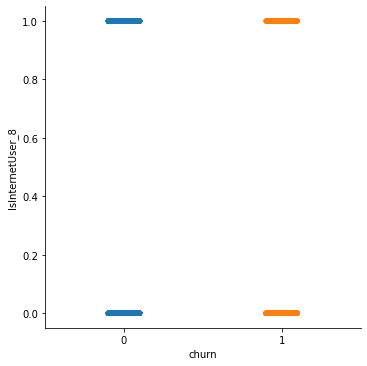

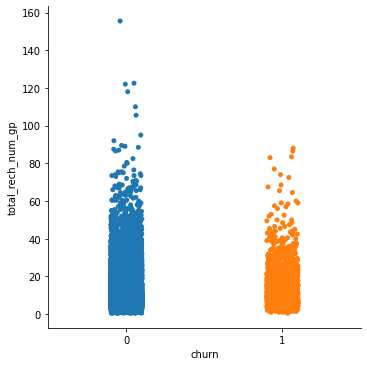

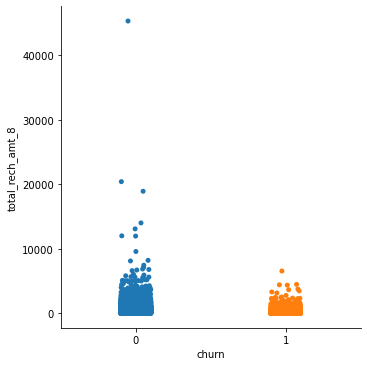

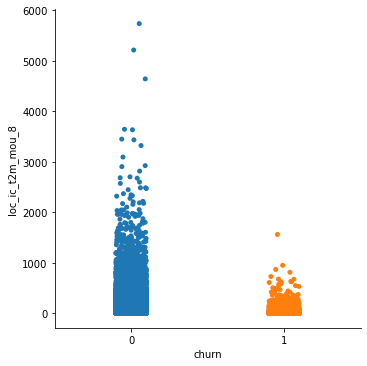

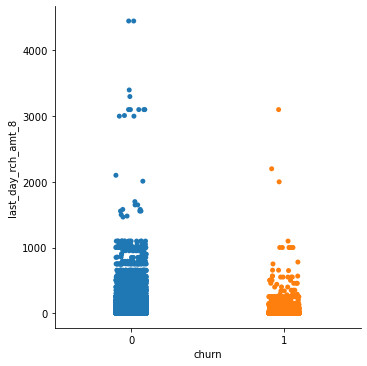

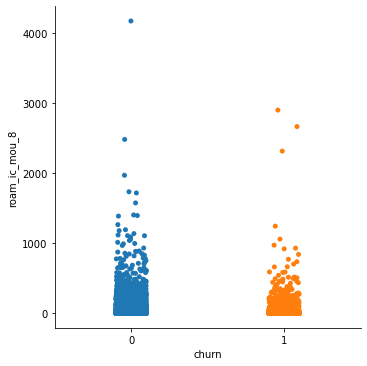

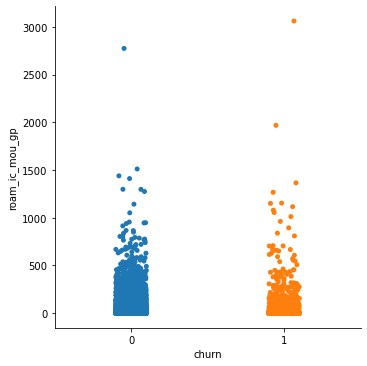

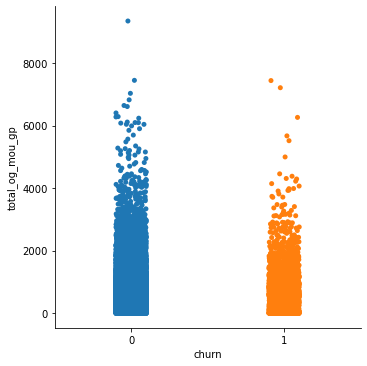

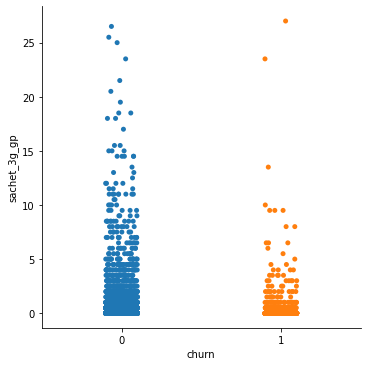

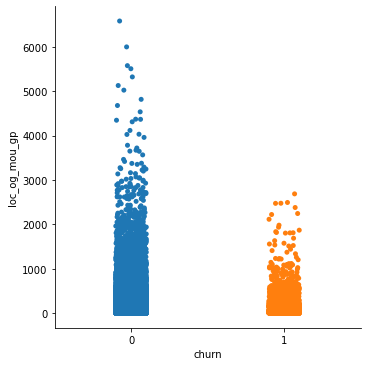

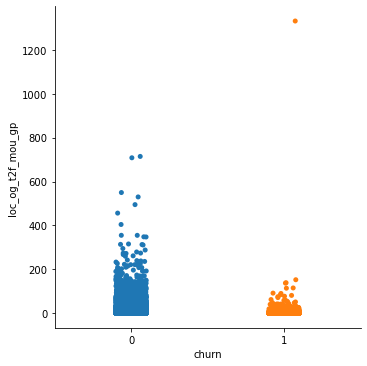

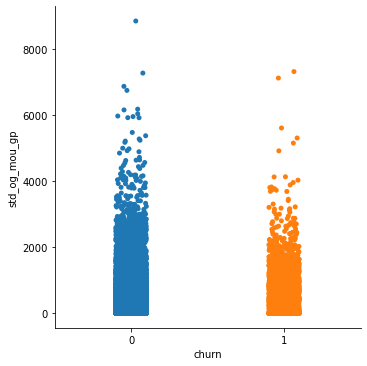

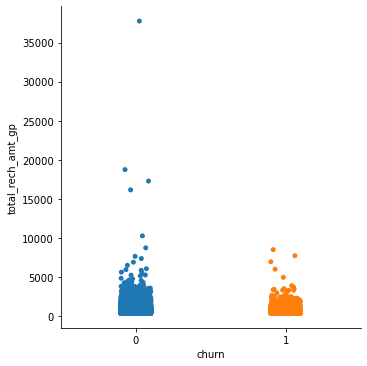

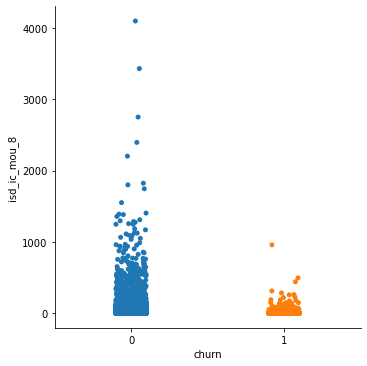

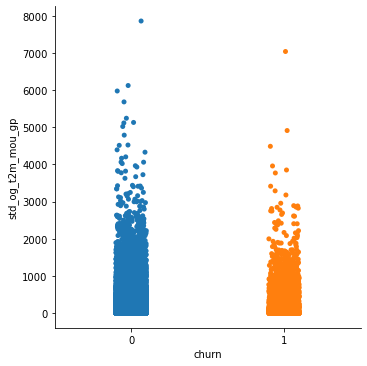

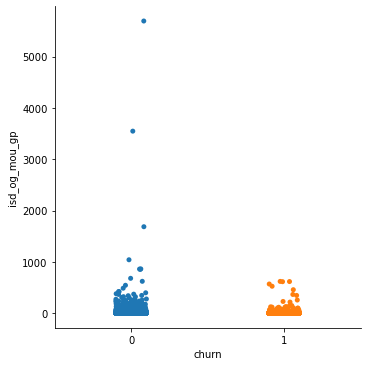

In [157]:
for column in list(xgboost_dict.keys())[:20]:
    sns.catplot(y=column,data=telecom_final_data ,x='churn')

### Observations based on key features/predictors

1. If customer has recharged more than 50 times in action phase , chances of getting churned is less.
2. If customer has made more number of calls( outside their own network,local ig/og calls,std calls,roaming og calls) then chances of churning is less.
3. If customer has used more volume of 3g/2g data ,purchased sachets of 3g pack then chances of churning is less.

## Recommended strategies to manage customer churn

-  If customer has made t2c calls in good phase /action phase frequently then chances of churning is high. Company should address the issue as soon as possible by providing quick service in good phase.
- Company should provide discounts/offers on 3g/2g packs to high valued customers to minimize churn.
-  As, customers are making frequent roaming calls company should think of reducing the roaming rates.
- If customer has not recharged in action phase then company should try to reach out to them and give offers based on the good phase usage.